<a href="https://colab.research.google.com/github/Cventurelli/UDD-C4-DS-PROYECTO-7/blob/main/DUPLICADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#montar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Rutas conjuntos de datos

In [ ]:
# Obtenemos la ruta de acceso a los conjuntos de datos
train_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train'
val_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val'
test_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test'


Librería ImageHash


ImageHash es una biblioteca de Python que proporciona herramientas para generar valores de hash perceptuales para imágenes. Estos hashes se pueden utilizar para comparar imágenes en función de su contenido visual, lo que los hace útiles para encontrar imágenes similares o duplicadas.


El hash perceptual es una técnica para generar hashes de imágenes que son robustos a los cambios en la apariencia de la imagen que no afectan la similitud percibida de las imágenes. Esto significa que las imágenes que se ven similares al ojo humano tendrán valores de hash similares, incluso si se han redimensionado, recortado o tienen pequeñas diferencias de color o brillo.

In [ ]:
!pip install imagehash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 2.5 MB/s eta 0:00:00


# Duplicados

Con este codigo se define una función find_duplicate_images que busca imágenes duplicadas dentro de un directorio especificado. Aquí un resumen de su funcionamiento:


1. Diccionarios para almacenar información:

image_hashes: Diccionario para almacenar hashes de imágenes. La clave es el hash y el valor es una lista con las rutas de las imágenes que comparten ese hash (potenciales duplicados).

folder_duplicates: Diccionario para almacenar la cantidad de duplicados encontrados en cada carpeta. La clave es la ruta de la carpeta y el valor es el número de imágenes duplicadas encontradas en esa carpeta.


2. Función interna calculate_image_hash:

Esta función calcula el hash MD5 para una imagen dada su ruta.

También obtiene el tamaño de la imagen.


3. Recorriendo el directorio:

La función find_duplicate_images itera a través de un directorio y sus subdirectorios usando os.walk.


Para cada archivo encontrado:

Se construye la ruta completa del archivo usando os.path.join.

Se calcula el hash y tamaño de la imagen usando calculate_image_hash.


Si el hash ya está en el diccionario image_hashes:

Se agrega la ruta de la imagen a la lista asociada al hash en image_hashes.

Si la carpeta actual no está en folder_duplicates, se agrega con un valor inicial de 1 (un duplicado encontrado).

Si la carpeta ya está en folder_duplicates, se incrementa su valor en 1 (un duplicado adicional encontrado).

Si el hash no está en image_hashes, se agrega como clave con una lista conteniendo la ruta de la imagen como valor.



4. Imprimiendo resultados generales:

Se calcula el total de duplicados sumando los valores de folder_duplicates.

Se imprime un mensaje que indica el directorio y el número total de duplicados encontrados.


5. Imprimiendo resultados por carpeta:

Se itera sobre el diccionario folder_duplicates.


Para cada carpeta:

Se calcula el número total de imágenes en la carpeta.

Se calcula el porcentaje de duplicados en la carpeta dividiendo el número de duplicados por el número total de imágenes y multiplicando por 100.

Se imprime un mensaje que indica la carpeta, el número de duplicados encontrados y el porcentaje de duplicados.


6. Buscando duplicados en rutas específicas:

Al final del código, se definen tres rutas para directorios de entrenamiento (train_path), validación (val_path) y prueba (test_path).

Se llama a la función find_duplicate_images para cada una de estas rutas, lo que permite identificar y reportar los duplicados encontrados en cada conjunto de datos.


En resumen, este código es una herramienta útil para encontrar imágenes duplicadas dentro de un directorio y sus subdirectorios. Calcula el hash MD5 de las imágenes y utiliza esa información para identificar archivos con contenido idéntico o muy similar.

In [ ]:
import os
import hashlib

def find_duplicate_images(path):
    image_hashes = {}
    folder_duplicates = {}

    def calculate_image_hash(image_path):
        with open(image_path, 'rb') as f:
            image_data = f.read()
            image_hash = hashlib.md5(image_data).hexdigest()
            image_size = os.path.getsize(image_path)
            return image_size, image_hash

    for root, dirs, files in os.walk(path):
        for file in files:
            image_path = os.path.join(root, file)
            size, hash = calculate_image_hash(image_path)
            if hash in image_hashes:
                image_hashes[hash].append(image_path)
                if root not in folder_duplicates:
                    folder_duplicates[root] = 1
                else:
                    folder_duplicates[root] += 1
            else:
                image_hashes[hash] = [image_path]

    total_duplicates = sum(folder_duplicates.values())
    print(f"Directorio {path}: {total_duplicates} imágenes duplicadas")

    for folder, count in folder_duplicates.items():
        total_images = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
        percentage = (count / total_images) * 100
        print(f"Carpeta {folder}: {count} imágenes duplicadas ({percentage:.2f}%)")

# Buscar imágenes duplicadas en cada ruta
train_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train'
val_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val'
test_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test'

find_duplicate_images(train_path)
find_duplicate_images(val_path)
find_duplicate_images(test_path)

Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train: 26 imágenes duplicadas
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/NORMAL: 1 imágenes duplicadas (0.07%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/PNEUMONIA: 25 imágenes duplicadas (0.65%)
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val: 0 imágenes duplicadas
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test: 6 imágenes duplicadas
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/NORMAL: 3 imágenes duplicadas (1.28%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/PNEUMONIA: 3 imágenes duplicadas (0.77%)


Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train: 26 imágenes duplicadas
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/NORMAL: 1 imágenes duplicadas (0.07%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/PNEUMONIA: 25 imágenes duplicadas (0.65%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/NORMAL:
  Ejemplo de imagen duplicada: /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/NORMAL/NORMAL2-IM-0587-0001-0001.jpeg


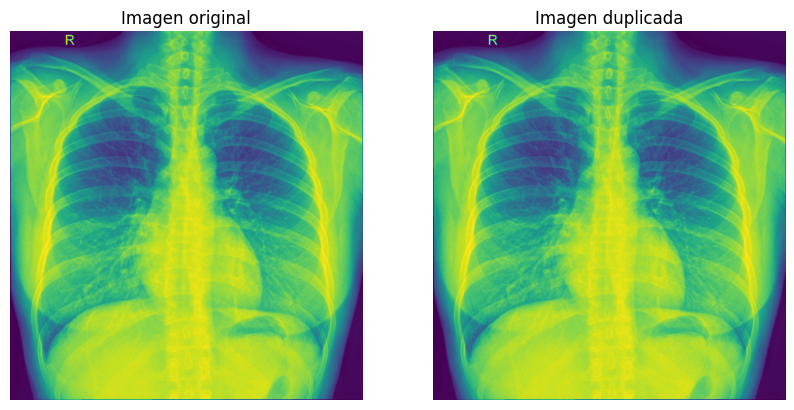


Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/PNEUMONIA:
  Ejemplo de imagen duplicada: /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train/PNEUMONIA/person30_bacteria_157.jpeg


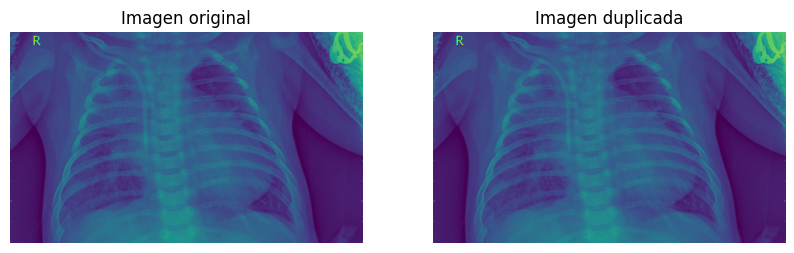


Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val: 0 imágenes duplicadas
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test: 6 imágenes duplicadas
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/NORMAL: 3 imágenes duplicadas (1.28%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/PNEUMONIA: 3 imágenes duplicadas (0.77%)
Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/NORMAL:
  Ejemplo de imagen duplicada: /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/NORMAL/NORMAL2-IM-0246-0001-0001.jpeg


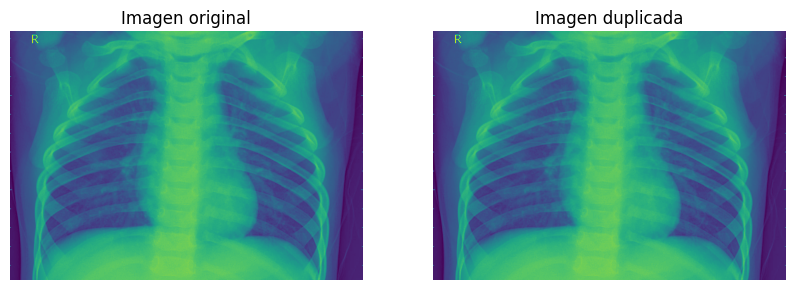


Carpeta /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/PNEUMONIA:
  Ejemplo de imagen duplicada: /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test/PNEUMONIA/person128_bacteria_606.jpeg


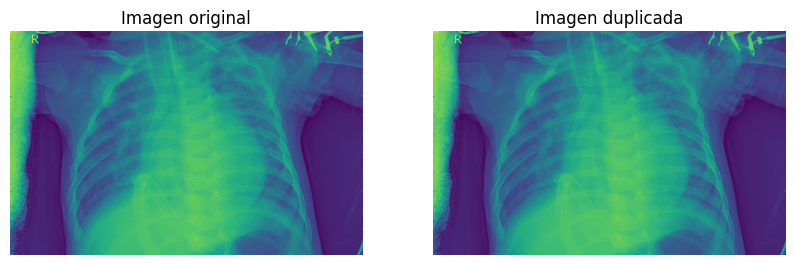

In [ ]:
import os
import hashlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def find_duplicate_images(path):
    image_hashes = {}
    folder_duplicates = {}

    def calculate_image_hash(image_path):
        with open(image_path, 'rb') as f:
            image_data = f.read()
            image_hash = hashlib.md5(image_data).hexdigest()
            image_size = os.path.getsize(image_path)
            return image_size, image_hash

    for root, dirs, files in os.walk(path):
        for file in files:
            image_path = os.path.join(root, file)
            size, hash = calculate_image_hash(image_path)
            if hash in image_hashes:
                image_hashes[hash].append(image_path)
                if root not in folder_duplicates:
                    folder_duplicates[root] = 1
                else:
                    folder_duplicates[root] += 1
            else:
                image_hashes[hash] = [image_path]

    total_duplicates = sum(folder_duplicates.values())
    print(f"Directorio {path}: {total_duplicates} imágenes duplicadas")

    for folder, count in folder_duplicates.items():
        total_images = len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])
        percentage = (count / total_images) * 100
        print(f"Carpeta {folder}: {count} imágenes duplicadas ({percentage:.2f}%)")

    # Mostrar 1 ejemplo de imágenes duplicadas en cada carpeta
    for folder, count in folder_duplicates.items():
        if count > 0:
            print(f"Carpeta {folder}:")
            for hash, image_paths in image_hashes.items():
                if len(image_paths) > 1 and folder in image_paths[0]:
                    print(f"  Ejemplo de imagen duplicada: {image_paths[0]}")
                    # Mostrar imágenes duplicadas
                    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
                    image1 = mpimg.imread(image_paths[0])
                    image2 = mpimg.imread(image_paths[1])

                    ax[0].imshow(image1)
                    ax[0].set_title('Imagen original')
                    ax[0].axis('off')

                    ax[1].imshow(image2)
                    ax[1].set_title('Imagen duplicada')
                    ax[1].axis('off')

                    plt.show()
                    break
            print()

# Buscar imágenes duplicadas en cada ruta
train_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train'
val_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val'
test_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test'

find_duplicate_images(train_path)
find_duplicate_images(val_path)
find_duplicate_images(test_path)

In [ ]:
import os
import hashlib
import shutil
import pickle
from tqdm import tqdm

# Rutas de las carpetas originales
train_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/train'
val_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/val'
test_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA/test'

# Ruta de la carpeta destino
destination_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN'

# Ruta de la carpeta EDA
eda_path = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/EDA'

# Función para calcular el hash de una imagen
def calculate_image_hash(image_path):
    with open(image_path, 'rb') as f:
        image_data = f.read()
        image_hash = hashlib.md5(image_data).hexdigest()
        return image_hash

# Crear carpetas destino
os.makedirs(destination_path, exist_ok=True)
os.makedirs(os.path.join(destination_path, 'train'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'val'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'test'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'train', 'normal'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'train', 'pneumonia'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'val', 'normal'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'val', 'pneumonia'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'test', 'normal'), exist_ok=True)
os.makedirs(os.path.join(destination_path, 'test', 'pneumonia'), exist_ok=True)

print("Copiando imágenes...")

# Copiar imágenes no duplicadas a la carpeta destino
image_hashes = {}
for root, dirs, files in os.walk(train_path):
    for file in tqdm(files, desc="Copiando imágenes de entrenamiento"):
        image_path = os.path.join(root, file)
        image_hash = calculate_image_hash(image_path)
        if image_hash not in image_hashes:
            image_hashes[image_hash] = image_path
            if 'NORMAL' in image_path.upper():
                shutil.copy(image_path, os.path.join(destination_path, 'train', 'normal'))
            else:
                shutil.copy(image_path, os.path.join(destination_path, 'train', 'pneumonia'))

image_hashes = {}
for root, dirs, files in os.walk(val_path):
    for file in tqdm(files, desc="Copiando imágenes de validación"):
        image_path = os.path.join(root, file)
        image_hash = calculate_image_hash(image_path)
        if image_hash not in image_hashes:
            image_hashes[image_hash] = image_path
            if 'NORMAL' in image_path.upper():
                shutil.copy(image_path, os.path.join(destination_path, 'val', 'normal'))
            else:
                shutil.copy(image_path, os.path.join(destination_path, 'val', 'pneumonia'))

image_hashes = {}
for root, dirs, files in os.walk(test_path):
    for file in tqdm(files, desc="Copiando imágenes de prueba"):
        image_path = os.path.join(root, file)
        image_hash = calculate_image_hash(image_path)
        if image_hash not in image_hashes:
            image_hashes[image_hash] = image_path
            if 'NORMAL' in image_path.upper():
                shutil.copy(image_path, os.path.join(destination_path, 'test', 'normal'))
            else:
                shutil.copy(image_path, os.path.join(destination_path, 'test', 'pneumonia'))

# Guardar resultado en archivo pickle
result = {
    'train': image_hashes,
    'val': image_hashes,
    'test': image_hashes
}

with open(os.path.join(eda_path, 'EDA.pickle'), 'wb') as f:
    pickle.dump(result, f)

print("Resultado guardado en archivo pickle EDA.pickle en la carpeta EDA")
print("Copiado completo!")

Copiando imágenes...


Copiando imágenes de entrenamiento: 0it [00:00, ?it/s]
Copiando imágenes de entrenamiento: 100%|██████████| 3875/3875 [02:47<00:00, 23.07it/s]
Copiando imágenes de validación: 0it [00:00, ?it/s]
Copiando imágenes de validación: 100%|██████████| 8/8 [00:00<00:00, 46.22it/s]
Copiando imágenes de prueba: 0it [00:00, ?it/s]
Copiando imágenes de prueba: 100%|██████████| 390/390 [00:11<00:00, 34.43it/s]

Resultado guardado en archivo pickle EDA.pickle en la carpeta EDA
Copiado completo!


In [ ]:
import os

base_dir = '/content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN'

# Crear rutas para los directorios de entrenamiento, validación y prueba
train_dir, validation_dir, test_dir = [os.path.join(base_dir, dir) for dir in ['train', 'val', 'test']]

def print_directory_info(directory):
    total_images = 0
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        if os.path.isdir(file_path):
            num_images = len([f for f in os.listdir(file_path) if os.path.isfile(os.path.join(file_path, f))])
            print(f"Carpeta: {file}, Número de imágenes: {num_images}")
            total_images += num_images
        else:
            print(f"Archivo: {file}, Tamaño: {os.path.getsize(file_path)} bytes")
    print(f"Directorio {directory}: ({total_images} imágenes)")

print_directory_info(train_dir)
print()
print_directory_info(validation_dir)
print()
print_directory_info(test_dir)

Carpeta: normal, Número de imágenes: 1340
Carpeta: pneumonia, Número de imágenes: 3860
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/train: (5200 imágenes)

Carpeta: normal, Número de imágenes: 8
Carpeta: pneumonia, Número de imágenes: 8
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/val: (16 imágenes)

Carpeta: normal, Número de imágenes: 232
Carpeta: pneumonia, Número de imágenes: 388
Directorio /content/drive/MyDrive/BOOTCAMP_DATA_SCIENCE/PROYECTO_7/DATA_CLEAN/test: (620 imágenes)
